# LogisticRegression

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

## オッズとlogit
- p / (1- p)
- 上記に対数関数適用

In [30]:
def odds(p):
    return p / (1 - p)

In [105]:
def plot_logit(ps):
    figure, axes = plt.subplots(1, 4, figsize=(20, 5))

    s_odds = np.vectorize(odds)(ps)
    s_logit = np.log(s_odds)
    df = pd.DataFrame({
            "p": ps,
            "odds": s_odds,
            "logit": s_logit
        })
    df.plot(x="p", y="odds", ax=axes[0])
    df.plot(x="odds", y="logit", ax=axes[1])
    df.plot(x="p", y="logit", ax=axes[2])
    df.plot(y="p", x="logit", ax=axes[3])

    return df.T

0         1         2         3         4         5         6    \
logit -6.906755 -6.212606 -5.806138 -5.517453 -5.293305 -5.109978 -4.954821   
odds   0.001001  0.002004  0.003009  0.004016  0.005025  0.006036  0.007049   
p      0.001000  0.002000  0.003000  0.004000  0.005000  0.006000  0.007000   

            7         8         9       ...           989         990  \
logit -4.820282 -4.701490 -4.595120     ...       4.59512    4.701490   
odds   0.008065  0.009082  0.010101     ...      99.00000  110.111111   
p      0.008000  0.009000  0.010000     ...       0.99000    0.991000   

              991         992         993         994         995         996  \
logit    4.820282    4.954821    5.109978    5.293305    5.517453    5.806138   
odds   124.000000  141.857143  165.666667  199.000000  249.000000  332.333333   
p        0.992000    0.993000    0.994000    0.995000    0.996000    0.997000   

              997         998  
logit    6.212606    6.906755  
odds   499.000000  999.000000  
p        0.998000    0.999000  

[3 rows x 999 columns]

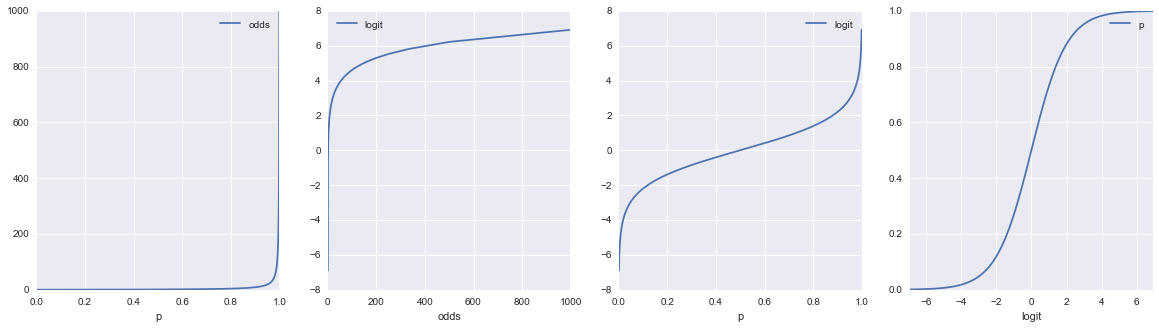

In [101]:
plot_logit(np.linspace(0.001, 0.999, 999))


## logitの逆関数(ロジスティック関数)

- y = log(p/ (1 - p))
- -y = log((1 - p) / p) = log(1/p - 1)
- exp(-y) = (1/p - 1)
- exp(-y) + 1 = 1/p
- p = 1 / (exp(-y) + 1)


### http://www012.upp.so-net.ne.jp/doi/biostat/CT39/glm.pdf




In [121]:
def a(x):
    return 1.0 / (1.0 + np.exp(-x))

In [122]:
def plot_a(xs):
    s_a = np.vectorize(a)(xs)
    df = pd.DataFrame({
            "x": xs,
            "a": s_a
        })
    df.plot(x="x", y="a")

    return df.T

0         1         2         3         4         5         6   \
a   0.000045  0.000123  0.000335  0.000911  0.002473  0.006693  0.017986   
x -10.000000 -9.000000 -8.000000 -7.000000 -6.000000 -5.000000 -4.000000   

         7         8         9     ...            11        12        13  \
a  0.047426  0.119203  0.268941    ...      0.731059  0.880797  0.952574   
x -3.000000 -2.000000 -1.000000    ...      1.000000  2.000000  3.000000   

         14        15        16        17        18        19         20  
a  0.982014  0.993307  0.997527  0.999089  0.999665  0.999877   0.999955  
x  4.000000  5.000000  6.000000  7.000000  8.000000  9.000000  10.000000  

[2 rows x 21 columns]

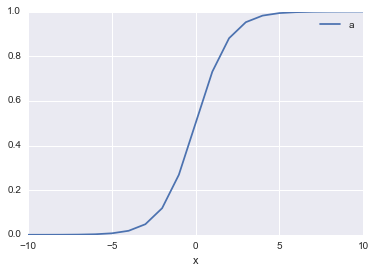

In [127]:
plot_a(np.arange(-10, 11))
